Ιωάννης Παλιάκης 
03114877

<h2>3<sup>η</sup> ΕΡΓΑΣΤΗΡΙΑΚΗ ΑΣΚΗΣΗ</h2>
<h3>Γενετικοί Αλγόριθμοι</h3>
<p style=text-align:justify>Στην παρούσα άσκηση θα εξοικειωθείτε με την χρήση των γενετικών αλγορίθμων και την επιλογή των παραμέτρων τους. Επιπλέον, θα αναπτύξετε ένα γενετικό αλγόριθμο για τον εντοπισμό κοινοτήτων σε πραγματικά δίκτυα και θα συγκρίνετε το αποτέλεσμά του με τους αλγόριθμους εντοπισμού κοινοτήτων που εφαρμόστηκαν στην 2<sup>η</sup> εργαστηριακή άσκηση.</p>

In [1]:
%matplotlib inline

import matplotlib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import random

from scipy.integrate import odeint

### Άσκηση 1: Εξοικείωση με Γενετικούς Αλγόριθμους

#### Πρόβλημα ONEMAX

<p style=text-align:justify>Βρείτε την δυαδική ακολουθία $(x_1, x_2, ..., x_n)$ που μεγιστοποιεί το άθροισμα $x_1 + x_2 + ... + x_n, n=20$. Αναλύστε την επίδραση του μεγέθους του πληθυσμού, της πιθανότητας διασταύρωσης (crossover) και της πιθανότητας μετάλλαξης (mutation) στην ποιότητα της λύσης (πόσο κοντά είναι στην προφανή βέλτιστη λύση) που προκύπτει από το γενετικό αλγόριθμο. Συγκεκριμένα, μεταβάλλετε τον πληθυσμό από $10$ ως $100$ χρωμοσώματα με βήμα $10$,την πιθανότητα διασταύρωσης από $0.3$ ως $0.9$ με βήμα $0.1$ και την πιθανότητα μετάλλαξης από $0.01$ ως $0.2$ με βήμα $0.01$. Εξετάστε την ποιότητα της λύσης του γενετικού αλγορίθμου καθώς αλλάζετε τις παραμέτρους. Ελιτισμό μπορείτε να χρησιμοποιήσετε αν το επιθυμείτε.</p>

In [2]:
n=20

Ο αλγόριθμος δουλεύει ως εξής:
Αρχικά φτιάχνει τον πληθυσμό από τυχαία χρωμοσώματα. Στην συνέχεια διαλέγει από τον πληθυσμό με βάση την μέθοδο της ρουλέτας τόσα χρωμοσώματα όσα είναι και ο πληθυσμός. Άρα αυτά που είναι αρκετά "fit" επιλέγονται αρκετές φορές. Έπειτα ανα 2 τα επιλεγμένα "ζευγαρώνουν" μεταξύ τους με μία πιθανότητα pc. Το ζευγάρωμα γίνεται ως εξής. Επιλέγονται 2 τυχαία σημεία (ή όσα βάλουμε σαν είσοδο). Ξεκινάει ο ένας πατέρας και αντιγράφει το χρωμόσωμα στο παιδί. Μόλις φτάσει στο πρώτο σημείο (index) σταματάει και ξεκινάει από εκεί και μέχρι το δεύτερο σημείο να αντιγράφει ο δεύτερος πατέρας το χρωμόσωμα στο παιδί. Από το δεύτερο σημείο και μέχρι το τέλος αντιγράφει πάλι ο πρώτος πατέρας το χρωμόσωμα του στο παιδί. Μόλις γίνει αυτή η διαδικασία έχουμε το mutation σε κάθε bit του χρωμοσώματος με πιθανότητα pm. Ο νέος πληθυσμός τώρα γίνεται οι απόγονοι που τους έχει γίνει mutation. Σε αυτούς γίνεται η ίδια διαδικασία 30 φορές. Στο τέλος διαλέγω τον πιο fit και τον δίνω σαν λύση. Παρακάτω βλέπουμε τα αποτελέσματα ότι δεν έιναι βέλτιστα, έχουν ένα μέσο όρο περίπου στο 14 με άριστα το 20. Πάνε προς την λύση αλλά ίσως πιο αργά. Με περισσότερες επαναλήψεις ίσως θα φτάνουμε σε καλύτερα αποτελέσματα

In [3]:
def create_population(n,m):
    popul  = []
    for i in range(m):
        popul.append([random.choice('10') for x in range(n)])
    return popul
    

def find_fitness(lst):
    summ=0
    for i in lst:
        if i=="1":
            summ+=1
    return summ

def proportional_selection(N,population):
    lista=[]
    for i in population:
        fitness  = find_fitness(i)
        lista.append(fitness)
    athroisma  = sum(lista);
    probs = [x/athroisma for x in lista]
    choices = [i for i in range(len(lista))]
    temp = np.random.choice(
      choices,
        size = N,
        replace = True,
      p = probs
    )
    return temp

    
def birth(p1,p2,points):
    leng = len(points);
    points.append(len(p1))
    child = []
    prev = 0
    p=p1
    for i in points:
        if i!=prev:
            child = child + p[prev:i]
        prev = i
        p=p1 if p==p2 else p2
    return child
    
def crossover(points,chosen,population,n,prob,N):
    return_list= []
    total =0 
    while(total==0):
        for i in range(0,len(chosen)-1, 2):
            if random.random()<prob:
                total+=1
                ps = random.sample(range(0, n), points)
                ps.sort() 
                return_list.append(birth(population[chosen[i]],population[chosen[i+1]],ps))
    return return_list
#     index = [0]*len(chosen)
#     if len(chosen)<2:
#         return None
#     return_list= []
#     total=0
#     finish=False
#     summ=0
#     while(total==0 and finish==False):
#         for ind,i in enumerate(chosen):
#             couples = [x for x in chosen[ind+1:len(chosen)] if random.random() < prob]
#             temp  = len(couples)
#             if summ+temp>N:
#                 couples = couples[0:N-summ]
#                 finish = True
#             summ+=temp
#             for k in couples:
#                 total+=1
#                 ps = random.sample(range(0, n), points)
#                 ps.sort() 
#                 return_list.append(birth(population[i],population[k],ps))
#     return return_list

def mutation(chosen,prob):
    for i in chosen:
        for ind,j in enumerate(i):
            mutation = np.random.choice([1,0],size = 1,p = [prob,1-prob])
            if mutation==1:
                i[ind]='1' if i[ind]=='0' else '0'
    return chosen
            

def genetic_algorithm(n,m,crossover_prob=0.3,mutation_prob=0.01,points=2,iterations=30):
    N=m
    population = create_population(n,m);
    selected = proportional_selection(N,population);
    crossed = crossover(points,selected,population,n,crossover_prob,N)
    mutated = mutation(crossed,mutation_prob)
    for x in range(iterations):
        selected = proportional_selection(N,mutated);
        crossed = crossover(points,selected,mutated,n,crossover_prob,N)
        mutated = mutation(crossed,mutation_prob)
    max1 = -1
    for i in mutated:
        if max1<find_fitness(i):
            max1 = find_fitness(i);
            ret = i
    return i
        

In [5]:
it=10
pop =10
while pop<100:
    cr_pb=0.3
    while cr_pb<1:
        mt_pb=0.01
        while mt_pb<0.21:
            temp=find_fitness(genetic_algorithm(20,pop,crossover_prob=cr_pb,mutation_prob=mt_pb,points=3))
            print('{} \n'.format(temp))
            mt_pb+=0.05
        cr_pb+=0.15
    pop+=20
            
            


12 

8 

7 

9 

8 

6 

6 

12 

11 

12 

11 

12 

9 

10 

15 

12 

13 

14 

11 

11 

12 

11 

11 

10 

9 

13 

16 

7 

14 

15 

10 

10 

9 

12 

13 

10 

14 

9 

13 

8 

12 

9 

11 

11 

16 

17 

10 

16 

15 

12 

12 

8 

15 

14 

11 

11 

16 

15 

8 

7 

11 

15 

9 

10 

13 

11 

8 

13 

12 

12 

16 

10 

11 

12 

14 

10 

13 

15 

8 

10 

15 

8 

9 

11 

15 

12 

9 

12 

14 

14 

11 

9 

16 

12 

8 

11 

16 

13 

8 

8 



### Άσκηση 2: Εντοπισμός Κοινοτήτων σε Γράφους Κοινωνικών Δικτύων με Χρήση Γενετικών Αλγορίθμων

<p style=text-align:justify>Στην παρούσα άσκηση θα αναπτύξετε κώδικα για εντοπισμό κοινοτήτων σε γράφους δικτύων με χρήση γενετικών αλγορίθμων. Ακολούθως θα εφαρμόσετε το γενετικό αλγόριθμο για τον εντοπισμό κοινοτήτων σε πραγματικά δίκτυα και θα συγκρίνετε το αποτέλεσμά του με εκείνο των αλγορίθμων της δεύτερης εργαστηριακής άσκησης χρησιμοποιώντας τη μετρική modularity.</p>

##### Αναπαράσταση υποψήφιων λύσεων (χρωμοσωμάτων)
<p style=text-align:justify>Κάθε χρωμόσωμα $b_{i,t}$ του πληθυσμού τη χρονική στιγμή $t$ είναι ένα διάνυσμα με μήκος ίσο με το πλήθος των κόμβων του δικτύου, $n$. Αν $b_{i,t}(j)=d$ τότε οι κόμβοι $j,d$ ανήκουν στην ίδια κοινότητα. Επιπλέον για να ισχύει $b_{i,t}(j)=d$ , οι κόμβοι $j,d$ θα πρέπει να συνδέονται στην αρχική τοπολογία. Τότε, βρίσκοντας τις συνδεδεμένες συνιστώσες του χρωμοσώματος $b_{i,t}$ , προκύπτουν οι κοινότητες του δικτύου.</p>

##### Αρχικοποίηση
<p style=text-align:justify>Η αρχική γενιά του πληθυσμού θα πρέπει να αποτελείται από χρωμοσώματα τα οποία θα είναι τυχαία επιλεγμένα και διορθωμένα ώστε ο αριθμός που υπάρχει σε κάθε θέση να είναι γείτονας του αντίστοιχου κόμβου. (Αν δεν ισχύει θα πρέπει να αντικατασταθεί από ένα γείτονα του αντίστοιχου κόμβου.) Θεωρείστε πληθυσμό $300$ χρωμοσωμάτων.</p>

##### Συνάρτηση Fitness
<p style=text-align:justify>Η συνάρτηση fitness υπολογίζεται όπως στις διαφάνειες 28 και 29 της αντίστοιχης διάλεξης του μαθήματος. Προσοχή για κάθε συνιστώσα (component) του γράφου θα πρέπει να βρίσκετε τον αντίστοιχο υπογράφο.</p>

##### Επιλογή (Selection)
<p style=text-align:justify>Η επιλογή χρωμοσωμάτων από μία γενιά του πληθυσμού για την κατασκευή της επόμενης γενιάς γίνεται με τη μέθοδο της ρουλέτας (διαφάνειες μαθήματος και αλγόριθμος). Τροποποιήστε τον παραπάνω αλγόριθμο ώστε να εφαρμόσετε και ελιτισμό, δηλαδή τα $x$ πρώτα χρωμοσώματα της νέας γενιάς θα είναι εκείνα τα χρωμοσώματα της προηγούμενης γενιάς που έχουν επιτύχει τη μέγιστη τιμή της συνάρτησης fitness.</p>

##### Διασταύρωση (Crossover)
<p style=text-align:justify>Η διασταύρωση πραγματοποιείται όπως περιγράφεται στον αλγόριθμο, μεταξύ διαδοχικών χρωμοσωμάτων της εκάστοτε γενιάς. Η πιθανότητα διασταύρωσης ανά ζεύγος είναι ίση με $p_C$.</p>

##### Μετάλλαξη (Mutation)
<p style=text-align:justify>Η μετάλλαξη πραγματοποιείται σε κάθε θέση του χρωμοσώματος με πιθανότητα $p_M$, όπως στον αλγόριθμο. Θα πρέπει ωστόσο ο αλγόριθμος να τροποποιηθεί ώστε να δίνει ένα τυχαίο γείτονα του κόμβου που αντιστοιχεί σε κάθε θέση ως αποτέλεσμα της μετάλλαξης.</p>

##### Κριτήριο Τερματισμού (Stopping Criterion)
<p style=text-align:justify>Ως κριτήριο τερματισμού ορίστε ένα μέγιστο πλήθος επαναλήψεων εφαρμογής του αλγορίθμου (γενεών πληθυσμού), ίσο με $30$, ή ότι η βέλτιστη τιμή της συνάρτησης fitness δεν έχει μεταβληθεί για τις τελευταίες $5$ επαναλήψεις. Εφαρμόστε τον παραπάνω γενετικό αλγόριθμο στις πραγματικές τοπολογίες της δεύτερης εργαστηριακής άσκησης που δίνονται και στον Πίνακα 1. Οι παράμετροι που θα πρέπει να εξεταστούν δίνονται στον παρακάτω πίνακα. Προσοχή θα πρέπει να εξεταστούν όλοι οι συνδυασμοί.</p>

<table style=width:100%>
<tr>
    <th style=text-align:left>Παράμετρος</th>
    <th style=text-align:left>Τιμές</th>
</tr>
<tr>
    <td style=text-align:left>Διαστάυρωση $p_C$</td>
    <td style=text-align:left>$0.7:0.9$ με βήμα $0.1$</td>
</tr>
<tr>
    <td style=text-align:left>Μετάλλαξη $p_M$</td>
    <td style=text-align:left>$\{0.1,0.2\}$</td>
</tr>
<tr>
    <td style=text-align:left>Ελιτισμός $x$</td>
    <td style=text-align:left>$1:3$ με βήμα $1$</td>
</tr>
</table>

<p style=text-align:justify>Συγκρίνετε το αποτέλεσμα του γενετικού αλγορίθμου (το καλύτερο για τις διάφορες επιλογές παραμέτρων) με εκείνο των αλγορίθμων εντοπισμού κοινοτήτων της εργαστηριακής άσκησης 2 (δίνονται και στον Πίνακα 2), υπολογίζοντας το modularity. Θα πρέπει να έχετε πρωτίστως μετατρέψει το αποτέλεσμα του γενετικού αλγορίθμου σε κατάλληλη μορφη πάνω στο χρωμόσωμα που επιτυγχάνει τη βέλτιστη τιμή της συνάρτησης fitness.</p>


In [4]:
### ATTENTION: don't change because the variables are used in the given code
### the use of the converted graph is optional

# Import real topologies 

football_gml = nx.read_gml("./football.gml")
lesmis_gml = nx.read_gml("./lesmis.gml")
dolphins_gml = nx.read_gml("./dolphins.gml")

def conv2int(G,start_value):
    nG = nx.convert_node_labels_to_integers(G, first_label=start_value)
    G_mapping = dict(enumerate(G.nodes,0))
    return nG,G_mapping

football, football_map = conv2int(football_gml,0)
lesmis, lesmis_map = conv2int(lesmis_gml,0)
dolphins, dolphins_map = conv2int(dolphins_gml,0)

In [85]:
def create_population(m,G):
  # Create the initial population
    n = G.shape[0]
    population= np.random.randint(0,n,(m,n))
    for i in range(m):
        for j in range(n):
            d = population[i,j] 
            if (G[j,d] != 1):        
                neighbours = []
                for k in range(n):
                    if (G[j,k]==1): neighbours.append(k)
        
                pos = random.randint(0,len(neighbours)-1)
                population[i,j] = neighbours[pos]

    return population

In [151]:

a =np.array([
        [1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])
x =a[[[1],[2]],[1,2]]
y =a[[1,2],[1,2]]
mean = np.mean(x,axis=1)
print(x)
print(mean)

power = np.power(x,2)
print(power)
len(x)

[[5 6]
 [8 9]]
[5.5 8.5]
[[25 36]
 [64 81]]


2

In [210]:
def comm(G): #Returns list of lists with nodes of communities in the chromosome
    temp =  list(G.subgraph(c) for c in nx.connected_components(G))
    return [list(i.nodes()) for i in temp]
    
def find_fitness(population,r,A):
    fitness_results = []
    m,n = population.shape
    for i in range(m):
        matrix = np.zeros((n,n))
        for j in range(n):
            matrix[int(population[i,j]),j]=1
            matrix[j,int(population[i,j])]=1
        
        G = nx.from_numpy_array(matrix);
        communities= comm(G)
        cs = 0;
        for i in communities:
            index = np.array(i)
            ypo = A[index[:, None], index] #for every list (i.e. node in the community) i take all the columns
            us = sum(sum(ypo))
            m = sum(np.power(np.mean(ypo,axis=1),r))/len(ypo)
            
            cs+= m*us
            
        fitness_results.append(cs)
    
    return fitness_results;

In [227]:
def crossover(pc, population):
  # Apply crossover to population
    after_population = np.zeros(population.shape)
    for i in range(after_population.shape[0]):
        if random.random() < pc:
            xrwm = np.zeros((2,population.shape[1]))
            xrwm[0,:] = population[i,:]
            parent2 = random.randint(0,population.shape[0]-1)
            while(parent2==i):
                parent2 = random.randint(0,population.shape[0]-1); # i want to avoid the same chromosom beacause
                                                            #it is included in the non crossover case
            xrwm[1,:] = population[parent2,:]
            maska = np.random.randint(0,1,(population.shape[1])) # Create the mask randomly 

            for j in range(len(maska)):
                after_population[i,j] = xrwm[maska[j],j]
      
        else:
            after_population[i,:] = population[i,:]

    return after_population

Σημείωση. Υπάρχει λάθος στην ιδεά του proportional selection, όπως μας την ζητάτε. Γιατί κατά αυτό τον τρόπο διαλέγουμε χρωμοσώμματα πολλές φορές ίδια και αυτά στην συνέχεια γονιμοποιούνται με τους εαυτούς τους, κάτι τέτοιο δεν γίνεται σε γεννετικούς αλγορίθμους και στην εξέλιξη γενικότερα

In [212]:
def proportional_selection(number_of_elites, population, fit ):
  # Select chromosomes to pass to next population proportionally to their fitness
    elites = np.argsort(fit)
    selected = np.zeros(population.shape)

    probs = []
    s = sum(fit)
    for fit_score in fit:
        probs.append(fit_score/s)

    for i in range(1,number_of_elites+1): #Implementation of the elitism we take unaltered the top elites
        pos = elites[-i]
        selected[i-1,:] = population[pos,:]

    for i in range(number_of_elites,population.shape[0]):
        number = random.random()
        k=0
        while k<population.shape[0]-1 and number > sum(probs[0:k]): #roullete impelentation
            k=k+1

        selected[i,:] = population[k,:]
  
    return selected

In [231]:
def mutation(pm, population, A):
  # Apply mutation to population
    for i in range(population.shape[0]):
        if random.random() < pm:
            index = random.randint(0, population.shape[1]-1)
            geitones = []
            for k in range(A.shape[1]):  #Τσεκάρω τους γείτουνες και τους βάζω σε μία λίστα για να διαλέξω εκτός 
                                        #από τον γείτονα που είναι ήδη, εκτός και αν δεν έχει άλλους γείτονες
                if A[index,k] == 1 and k!=population[i,index]:
                    geitones.append(k)
            if len(geitones)==0:
                gonidio = population[i,index];
            else:
                gonidio = geitones[random.randint(0,len(geitones)-1)]

            population[i,index] = gonidio

    return population

In [215]:
#function to extract the communities given a chromosome
#This function will help me extract the communities when i ll have the best chromosome
def coms_given_the_chromosome(chrom):
    n = len(chrom)
    matrix = np.zeros((n,n))
    for j in range(n):
        matrix[j,int(chrom[j])] = 1
        matrix[int(chrom[j]),j] = 1 

    G = nx.from_numpy_array(matrix)

    coms = comm(G)

    return coms

In [222]:
def genetic_algorithm(G,m,elitism,r,pc,pm):
    A = nx.to_numpy_array(G)
    n = A.shape[0]
    gens = []
    generation=0

    population = create_population(m,A)
    fit = find_fitness(population,r,A)
    

    best = np.argmax(fit)
    cnt = 1
    old_best = fit[best]
    gens.append((population[best,:], fit[best]))

    while generation<30 and cnt<=5:
        generation+=1
        selected = proportional_selection(elitism, population, fit)
        crossed = crossover(pc, selected)
        population = mutation(pm, crossed,A)

        fit = find_fitness(population,r,A)

        

        best = np.argmax(fit)

        if fit[best] == old_best: cnt=cnt+1
        else:
            old_best = fit[best]
            cnt=1

        gens.append((population[best,:], fit[best]))

    best_chrom = sorted(gens, key=lambda x: x[1], reverse=True)[0]
    coms = coms_given_the_chromosome(best_chrom[0])

    return  best_chrom, coms

In [223]:
def run_genetic(G,m,elite,r,pc,pm):
    results = np.zeros((len(pc), len(pm), len(elite)))
    best_fit = 0
    best_coms = None
    for i in range(len(pc)):
        for j in range(len(pm)):
            for k in range(len(elite)):
                best, nodes = genetic_algorithm(G, m, elite[k] , r, pc[i], pm[j])
                results[i,j,k] = best[1]

                if best[1] > best_fit:
                    best_fit = best[1]
                    best_coms = nodes
  
    return results, best_coms

In [224]:
pc_values = np.arange(0.7,0.9,0.1)
pm_values = [0.1,0.2]
elitism_values = list(range(1,4))

In [232]:
football_results, football_coms = run_genetic(football, 300, elitism_values,  1.2, pc_values, pm_values)
lesmis_results, lesmis_coms = run_genetic(lesmis, 300, elitism_values, 2, pc_values, pm_values)
dolphins_results, dolphins_coms = run_genetic(dolphins, 300, elitism_values, 1, pc_values, pm_values)

In [239]:
print(football_results)
x= np.argmax(football_results)
print(x)

[[[189.15388755 227.39704567 254.58968764]
  [257.12286688 284.04342509 258.04880774]]

 [[197.12157519 221.37389661 191.26537694]
  [252.98569339 232.91981041 283.41947982]]

 [[227.4277519  217.92926851 202.32233302]
  [219.95030449 285.14125133 268.47849697]]]
16


Παρατηρώ ότι για το football καλύτερο fitness έχω όταν διαλέγω pc=0.9 pm = 0.2 και ελιτισμό 2

In [240]:
print(lesmis_results)
x= np.argmax(lesmis_results)
print(x)

[[[112.17398179 117.42940623 113.61111999]
  [133.09445438 137.33176927 140.74927627]]

 [[120.36232567 112.32256054 134.24373617]
  [127.22737122 124.52586913 150.67271862]]

 [[107.16458443 121.48030862 115.23111142]
  [131.41614075 124.48788476 140.72774133]]]
11


Παρατηρώ ότι για το lesmis καλύτερο fitness έχω όταν διαλέγω pc=0.8 pm = 0.2 και ελιτισμό 3

In [242]:
print(dolphins_results)
x= np.argmax(dolphins_results)
print(x)

[[[61.40500945 63.17422748 62.52111111]
  [61.82553719 62.27419753 66.5065118 ]]

 [[62.09089002 65.62098784 59.67403628]
  [67.51006944 62.8608642  63.37267386]]

 [[64.16984694 63.828125   64.4314059 ]
  [65.1480568  61.57101501 67.30694444]]]
9


Παρατηρώ ότι για το dolphins καλύτερο fitness έχω όταν διαλέγω pc=0.8 pm = 0.2 και ελιτισμό 1

In [244]:
lst0 = [football,lesmis,dolphins]
lst1=[football_coms,lesmis_coms,dolphins_coms]
for i in range(3):
    print(nx.algorithms.community.quality.modularity(lst0[i],lst1[i]));


0.40015009221090614
0.5010462520925042
0.44126023495906


Συγκεκριμένα τα modularities είναι 0.4 , 0.5 και 0.44 Για το football το lesmis και το dolphins αντίστοιχα
Όπως φαίνεται από πάνω

In [250]:
def monularity_calc(G,coms):
    m = nx.algorithms.community.quality.modularity(G,coms)
    return m,len(coms)

In [252]:
football_gen_num, football_gen_mod = monularity_calc(football, football_coms)
lesmis_gen_num, lesmis_gen_mod = monularity_calc(lesmis, lesmis_coms)
dolphins_gen_num, dolphins_gen_mod = monularity_calc(dolphins, dolphins_coms)

### Find the best partition with Girvan-Newman, Spectral Clustering and Modularity Maximization
<p style=text-align:justify>Aποτέλεσματα των αλγορίθμων της δεύτερης εργαστηριακής άσκησης (με προτεινόμενη υλοποίηση).</p>

### Compare best modularity scores for all algorithms

In [245]:
import itertools

# Girvan_newman:partitions of at most k communities, select the one with the highest value of modularity.
def comd_GN(G,k):
    gn_G = nx.algorithms.community.centrality.girvan_newman(G)
    limited = itertools.takewhile(lambda c: len(c) <= k, gn_G)
    per_G = []
    com_G = []
    for communities in limited:
        per = nx.algorithms.community.quality.modularity(G,communities)
        per_G.append(per) #list of performance of each partition
        com_G.append(communities) # list of partitions
    max_mod_G = max(per_G) # maximum modularity value
    index_G = per_G.index(max(per_G)) # index of maximum modularity
    best_G = com_G[index_G] # the partition of maximum modularity  
    num_best_G = len(best_G)
    return best_G, max_mod_G, num_best_G

GN_best_football, GN_mod_football, GN_num_football = comd_GN(football,50)
GN_best_lesmis, GN_mod_lesmis, GN_num_lesmis = comd_GN(lesmis,50)
GN_best_dolphins, GN_mod_dolphins, GN_num_dolphins = comd_GN(dolphins,50)

In [246]:
from sklearn.cluster import SpectralClustering

# Spectral Clustering
def comd_SP(G,k):
    mG = np.array(nx.to_numpy_matrix(G))
    clustering = SpectralClustering(n_clusters=k,random_state=0, affinity='precomputed').fit(mG)
    clabels = clustering.labels_
    numc = clustering.n_clusters
    b = dict(enumerate(clabels,0)) # create a mapping of nodes indices to the community it belongs
    d = [] # a list of all communities (each list is a community)
    for i in range(0,numc):
        d.append([k for k,v in b.items() if float(v) == i])
    per = nx.algorithms.community.quality.modularity(G,d)
    return d, per, numc

def find_best_SP_partition(G,k):
    com = []
    com_mod = []
    com_num = []
    for i in range(2,k):
        tcom,tcom_mod,tcom_num = comd_SP(G,i)
        com.append(tcom)
        com_mod.append(tcom_mod)
        com_num.append(tcom_num)
    index = com_mod.index(max(com_mod))
    G_SP = com[index]
    G_SP_mod = com_mod[index]
    G_SP_num = com_num[index]
    return G_SP, G_SP_mod, G_SP_num

football_SP, football_SP_mod, football_SP_num = find_best_SP_partition(football,50) 
lesmis_SP, lesmis_SP_mod, lesmis_SP_num = find_best_SP_partition(lesmis,50)  
dolphins_SP, dolphins_SP_mod, dolphins_SP_num = find_best_SP_partition(dolphins,50)

In [247]:
# Modularity Maximization
def comd_MM(G):
    c = list(nx.algorithms.community.modularity_max.greedy_modularity_communities(G))
    mm_G = []
    for i,j in enumerate(c):
        a = list(j)
        mm_G.append(a)
    per = nx.algorithms.community.quality.modularity(G,mm_G)
    num_G = len(mm_G)
    return mm_G, per,num_G

football_MM, football_MM_mod, football_MM_num = comd_MM(football)
lesmis_MM, lesmis_MM_mod, lesmis_MM_num = comd_MM(lesmis)  
dolphins_MM, dolphins_MM_mod, dolphins_MM_num = comd_MM(dolphins)

In [254]:
# Compare results 
print ("American College Football")
print ("Girvan-Newman: %r communities with modularity score %r" %(GN_num_football, GN_mod_football))
print ("Spectral Clustering: %r communities with modularity score %r" %(football_SP_num, football_SP_mod))
print ("Modularity Maximization: %r communities with modularity score %r" %(football_MM_num, football_MM_mod))
print ("Genetic Algorithm: %r communities with modularity score %r" %(football_gen_mod,football_gen_num))
print()
print ("Les Miserables")
print ("Girvan-Newman: %r communities with modularity score %r" %(GN_num_lesmis, GN_mod_lesmis))
print ("Spectral Clustering: %r communities with modularity score %r" %(lesmis_SP_num, lesmis_SP_mod))
print ("Modularity Maximization: %r communities with modularity score %r" %(lesmis_MM_num, lesmis_MM_mod))
print ("Genetic Algorithm: %r communities with modularity score %r"%(lesmis_gen_mod,lesmis_gen_num))
print()
print ("Dolphins")
print ("Girvan-Newman: %r communities with modularity score %r" %(GN_num_dolphins, GN_mod_dolphins))
print ("Spectral Clustering: %r communities with modularity score %r" %(dolphins_SP_num, dolphins_SP_mod))
print ("Modularity Maximization: %r communities with modularity score %r" %(dolphins_MM_num, dolphins_MM_mod))
print ("Genetic Algorithm: %r communities with modularity score %r" %(dolphins_gen_mod,dolphins_gen_num))

American College Football
Girvan-Newman: 10 communities with modularity score 0.5996290274077957
Spectral Clustering: 11 communities with modularity score 0.6022010863056824
Modularity Maximization: 6 communities with modularity score 0.5497406651426807
Genetic Algorithm: 12 communities with modularity score 0.40015009221090614

Les Miserables
Girvan-Newman: 11 communities with modularity score 0.5380680761361523
Spectral Clustering: 7 communities with modularity score 0.5382230764461529
Modularity Maximization: 5 communities with modularity score 0.5005967511935024
Genetic Algorithm: 10 communities with modularity score 0.5010462520925042

Dolphins
Girvan-Newman: 5 communities with modularity score 0.5193821446936434
Spectral Clustering: 6 communities with modularity score 0.49497646453858624
Modularity Maximization: 4 communities with modularity score 0.4954906847039278
Genetic Algorithm: 8 communities with modularity score 0.44126023495906


Παραπάνω φαίνονται οι τιμές του modularity, για τους αλγορίθμους girvan_newman, spectral clustering και modularity maximazation αντιστοίχως. Μπορώ να δω ότι ο genetic δεν έχει σε κανέναν γράφο την ίδια ποιότητα λύσης με αυτή των προηγούμενων αλγορίθμων. Η καλύτερη επίδοση είναι στους lesmiserables αλλά και πάλι είναι χαμηλότερη από τους άλλους. Με επιμέρους βελτιστοποιήσεις όπως οι παραπάνω επαναλήψεις ή το καλύτερο fitness fucntion να πετυχέναμε καλύτερες επιδόσεις

#### Σχόλια για τα αποτελέσματα του γενετικού αλγόριθμου συγκριτικά με τους άλλους

## ΜΕΡΟΣ Β

Σε αυτό το μέρος θα επικεντρωθείτε στην αριθμητική επίλυση των βασικών επιδημιολογικών μοντέλων SIR και SIS: <a style="text-decoration:none" href=https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model>αριθμητική επίλυση συστημάτων διαφορικών εξισώσεων με scipy</a></p>

#### Άσκηση 1: SIR

Το SIR μοντέλο δίνεται από το ακόλουθο διαγραμμα μεταβάσεων καταστάσεων

![title](img/SIR.png)

και περιγράφεται από το σύνολο διαφορικών εξισώσεων

$\frac{dS}{dt} = -\frac{\beta S I}{N}$

$\frac{dI}{dt} = \frac{\beta S I}{N} - \gamma I$

$\frac{dR}{dt} = \gamma I$

Για τις παραμέτρους που φαίνονται στον ακόλουθο Πίνακα 3, να δείξετε σε κοινό διάγραμμα για κάθε συνδυασμό παραμέτρων, τα $S(t)$,$I(t)$,$R(t)$.Τι παρατηρείτε; Σχολιάστε τα αποτελέσματα σε σχέση με το βασικό ρυθμό αναπαραγωγής $R_0$.

<table style=width:60%>
<tr>
    <th style=text-align:center>Παράμετροι</th>
    <th style=text-align:center colspan='6'>Τιμές</th>
</tr>
<tr>
    <td style=text-align:center>$\beta$</td>
     <td style=text-align:center colspan='6'>$10^{-3}$</td>
</tr>
<tr>
    <td style=text-align:center>$\gamma$</td>
    <td style=text-align:center>$10^{-6}$</td>
    <td style=text-align:center>$10^{-5}$</td>
    <td style=text-align:center>$10^{-4}$</td>
    <td style=text-align:center>$10^{-3}$</td>
    <td style=text-align:center>$10^{-2}$</td>
    <td style=text-align:center>$10^{-1}$</td>
</tr>
<tr>
    <td style=text-align:center>$S(0)$</td>
    <td style=text-align:center colspan='6'>$5x0$</td>
</tr>
<tr>
    <td style=text-align:center>$I(0)$</td>
    <td style=text-align:center colspan='6'>$1x$</td>
</tr>
    <tr>
    <td style=text-align:center>$R(0)$</td>
    <td style=text-align:center colspan='6'>$0$</td>
</tr>
</table>

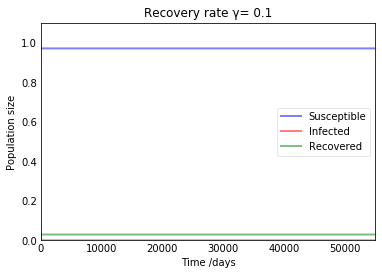

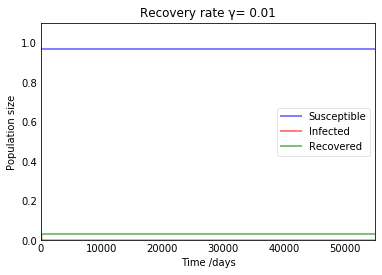

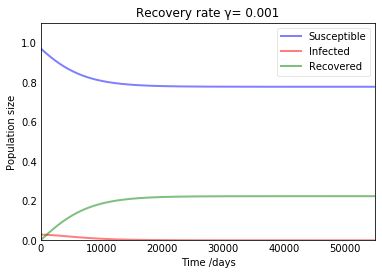

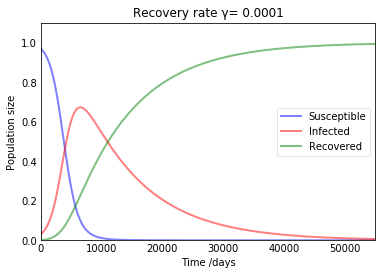

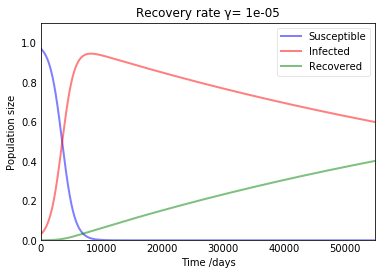

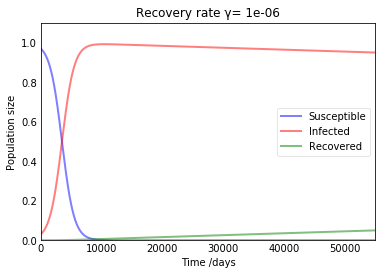

In [258]:
def solve_SIR(g):
    I0 = 17
    R0 = 0
    S0 = 570
    N = S0 + I0 + R0 #total population, N.
    beta = 10**(-3)  #Contact rate, beta
    gamma = 10**(-g) #mean recovery rate, gamma, (in 1/days)

    t = np.linspace(0, 55000, 200000) # A grid of time points (in days)

    # The SIR model differential equations.
    def deriv(y, t, N, beta, gamma):
        S, I, R = y
        dSdt = -beta * S * I / N
        dIdt = beta * S * I / N - gamma * I
        dRdt = gamma * I
        return dSdt, dIdt, dRdt
    
    y0 = S0, I0, R0 #Initial conditions vector
    ret = odeint(deriv, y0, t, args=(N, beta, gamma)) #Integrate the SIR equations over the time grid, t.
    S, I, R = ret.T

    # Plot the data on three separate curves for S(t), I(t) and R(t)
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, axisbelow=True)
    plt.title("Recovery rate γ= %r" %10**(-g))
    ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='Recovered')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('Population size')
    ax.set_ylim(0,1.1)
    ax.set_xlim(0,55000)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    plt.show()    
    
for i in np.linspace(1,6,num=6):
    solve_SIR(i)

Αυτό που παρατηρώ ότι όσο ο ρυθμός με τον οποίο αυτοί που είναι infected γίνονται recovered όπως είναι λογικό οι infected μένουν σε χαμηλό επίπεδο. ΌΤαν όμως περνάμε από ένα κατώφλι και γίνεται πολύ μικρό (γ = 10^-5), το R0 γίνεται μεγαλύτερο από 1 και τα πράγματα βαίνουν προς το χειρότερο ανεπιστρεπτί , που σημαίνει ότι όλοι γίνονται infected. Κάτι τέτοιο σε μία πανδημία που είναι θανατηφόρα έχει ολέθριες συνέπειες

#### Σχολιασμός SIR

#### Άσκηση 2: SIS

Για το μοντέλο SIS, υιοθετείται η περίπτωση περιοδικού ρυθμού επαφής κόμβων. Κάτι τέτοιο μπορεί να αντιστοιχεί σε μια περιοδικότητα στη λήψη επιδημιών, πχ. σε ετήσια βάση όπως με τον συνιθισμένο ιό της γρίπης. Το σύνολο των διαφορικών εξισώσεων το οποίο περιγράφει αυτό το μοντέλο είναι:

$\frac{dI}{dt} = (\beta(t)N-a)I - \beta(t)I^2$

$\beta(t) = 2-1.8\cos(5t)$

Για τους συνδυασμούς παραμέτρων που φαίνονται στον ακόλουθο πίνακα, να δείξετε σε κοινό διάγραμμα την εξέλιξη του φαινομένου για κάθε συνδιασμό τιμών ($I(t),\beta(t))$

<table style=width:60%>
<tr>
    <th style=text-align:center>Παράμετροι</th>
    <th style=text-align:center colspan='6'>Τιμές</th>
</tr>
<tr>
    <td style=text-align:center>$\alpha$</td>
    <td style=text-align:center>$6$</td>
    <td style=text-align:center>$5$</td>
    <td style=text-align:center>$4$</td>
    <td style=text-align:center>$3$</td>
    <td style=text-align:center>$2$</td>
    <td style=text-align:center>$1$</td>
</tr>
<tr>
    <td style=text-align:center>$N$</td>
    <td style=text-align:center colspan='6'>$1$</td>
</tr>
</table>

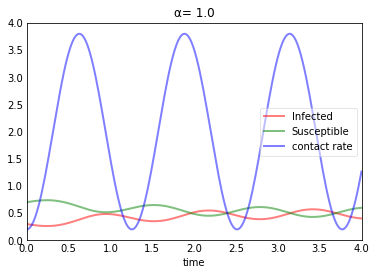

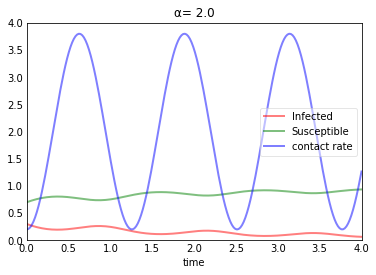

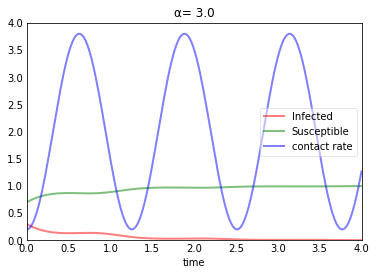

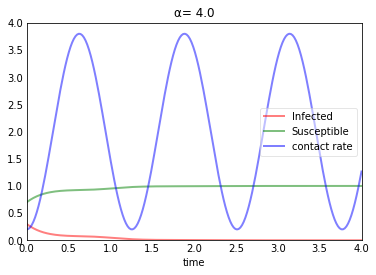

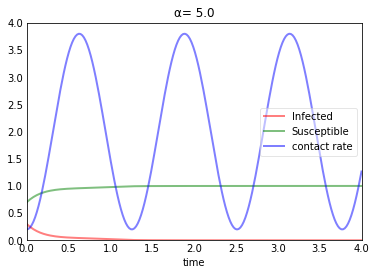

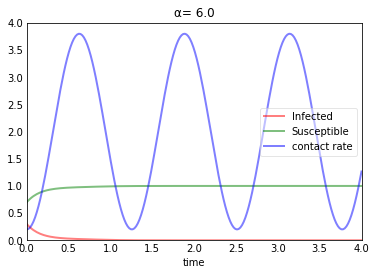

In [259]:
def solve_SIS(g):
    I0 = 0.3
    N = 1 #population percentage
    S0 = N - I0
    alpha = g
    t = np.linspace(0, 4, 200) #time points
    
    def beta(t):
        r = 2 - 1.8*np.cos(5*t);
        return r

    # The SIS model differential equations.
    def deriv(y, t, N, alpha):
        I = y
        dIdt = (beta(t) * N-alpha) * I - beta(t) * (I**2)
        return dIdt
    
    y0 = I0 #Initial conditions vector
    ret = odeint(deriv, y0, t, args=(N, alpha)) #Integrate the SIR equations over the time grid, t.
    I = ret
    
    def susc(N,I):
        s = N-I
        return s
    
    S = susc(N,I)
    
    # Plot the data on three separate curves for S(t), I(t) and R(t)
    fig = plt.figure()
    ax = fig.add_subplot(111, axisbelow=True)
    plt.title("α= %r" %g)
    ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, S, 'g', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, beta(t), 'b', alpha=0.5, lw=2, label='contact rate')
    ax.set_xlabel('time')
    ax.set_ylim(0,4)
    ax.set_xlim(0,4)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    plt.show()
    
for i in np.linspace(1,6,num=6):
    solve_SIS(i)

#### Σχολιασμός SIS

Παρατηρώ ότι όσο πιο μεγάλο είναι το άλφα τόσο πιο πολλοί άνθρωποι μολύνονται, αυτό είναι κάτι απολύτως λογικό γιατί
αυτός είναι ο ρυθμός που έρχονται σε επαφή οι infected με τους susceptible